# importing all the libraries

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random 
from IPython.display import clear_output



# reading or loading the dataset

In [2]:

data=pd.read_csv("USA_housing.csv")

In [3]:

data.columns


Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

# checking the correlation column vice

In [4]:
target_var=data['Price']




data=data.drop('Address',axis=1)          #axis=1 it drops columns vice
features=data.drop(['Price'],axis=1)


In [5]:
data=data.dropna(axis=0)    #droping NAN values

In [6]:
features.shape

(5000, 5)

In [8]:
print("target variable shape:",target_var.shape)
print("features variable shape:",features .shape)       #printing the shapes

target variable shape: (5000,)
features variable shape: (5000, 5)


In [9]:
target_var=np.array(target_var)
target_var=np.reshape(target_var,(1,len(target_var)))

In [10]:
target_var.shape

(1, 5000)

In [11]:
features=data.drop(['Price'],axis=1)
features=np.array(features)

# defining functions

In [12]:
def line_multidim(m,x,c):
    return np.dot(m,x.T) +c
def error(m,x,c,y):                                   #defining functions
    return np.mean(line_multidim(m,x,c)-y)**2
def derivative_intercept(m,x,c,y):
    return 2*np.mean(line_multidim(m,x,c)-y)
def acc_pred(error,y):
    arrow= error/np.mean(y**2)*100
    return 100- arrow



In [13]:
def derivative_slopes(m,x,c,y):
    l=line_multidim(m,x,c)-y
    l=np.array(l)
    slopes=2*np.mean(np.multiply(l, x.T),axis=1)
    slopes=np.array(slopes)
    return slopes.T


In [14]:
features=features/features.max()         #normalisation
target_var=target_var/target_var.max()


In [15]:
data=data.dropna(axis=1)

# gradient descent

current error: 0.001279627540408818
current error acurracy: 99.5251040455553


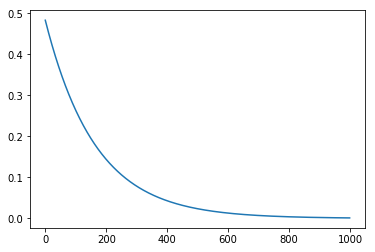

In [17]:
m=np.random.randn(1,5)
c=random.random()
lr=0.001
cost=[]
for i in range(0,1000):
    m=m-lr*derivative_slopes(m,features,c,target_var)
    c=c-lr*derivative_intercept(m,features,c,target_var)
    cost.append(error(m,features,c,target_var))
    clear_output(True)

    
    print("current error:" ,error(m,features,c,target_var))
    print("current error acurracy:",acc_pred(error(m,features,c,target_var),target_var)) 
    
plt.plot(cost)
plt.show()

    